# Wave Function Collapse Algorithm #
## By Patrick Gambill ##

In recent years, many video games have started implementing random level generation. It is relatively easy to generate a simple terrain with hand coded level generation algorithms. For more complicated terrains, these algorithms can be very time consuming. The Wave Function Collapse Algorithm (WFCA) allows terrains to be generated much more quickly.

## Goals for this notebook ##

This notebook will show a simple implementation of WFCA

This notebook will show how the WFCA can be used to generate terrains

This notebook will show how the WFCA can be used to solve sudoku like puzzles

## Required Libraries ##

Numpy

Matplotlib

Random

Copy

PIL

Tabulate

## Further Readings

[This](https://robertheaton.com/2018/12/17/wavefunction-collapse-algorithm/) blog post has a great visual explanation of WFCA.

[This](https://www.procjam.com/tutorials/wfc/) tutorial details how to implement WFCA in javascript.

[This](http://oskarstalberg.com/game/wave/wave.html) is a browser based interactive tool to see WFCA in action.




Lets get started!

## What is the Wave Function Collapse Algorithm?

The Wave Function Collapse Algorithm (WFCA) is an algorithm that can generated more complicated patterns from a set of rules and a set of states. Usually these states are images and the rule set determines what images are allowed in which position. These states can be other things as well, such as numbers or words.

## How does it work?

**Steps**

1. **Create the Grid:** The WFCA starts by creating a grid of a predetermined size. Each coordinate in the grid will have it's own array of Booleans, one element associated with each possible state. This array is called the wave function. If state is allowed at a given coordinate, the associated element wave function will be set to True. Otherwise, the associated element will be set to False. The number of possible states is called the entropy.
1. **Set the Initial Values:** If there are any coordinates that must have a specific state, take the coordinate's associated wave function, and set all values to False, except for the element associated with that state. When only one element of the wave function is True, then the wave function is said to have collapsed to the associated state. After collapsing a wave function, update all of the other wave functions in accordance with the rule set.
1. **Collapse Wave Functions:** Select the uncollapsed wave function with the smallest entropy. If multiple uncollapsed wave functions have the lowest entropy, choose one uniformly at random. In the selected wave function, choose an allowed state uniformly at random and collapse the wave function to this state.
1. **Update Possible States:** Update all of the other wave functions in accordance with the rule set. For more complicated rule sets, this might require checking non adjacent tiles.
1. **Repeat Steps 3 and 4, until all wave functions are collapsed** This is equivalent to checking that the entropy is 1 for every coordinate.
1. **Output the Grid** Each of the coordinates will contain a state. This will be the randomly generated pattern.

## An Example ##


Sudoku is a popular puzzle game that requires the player to put a unique number in each row, column, and square. Usually, the allowed numbers are the integers from 1 to 9 and the grid will be a 9 x 9 grid of cells, consisting of 9 3x3 squares. This means each number will appear exactly once in each row, column, or 3x3 square. Each number from 1 to 9 can be thought of as a possible state and each smaller number in a cell can be thought of as a possible state for that same cell. In order to help illustrate this, I am going to use images I have generated from an [online Sudoku solver](https://www.sudoku-solutions.com/)

An empty grid looks like this:

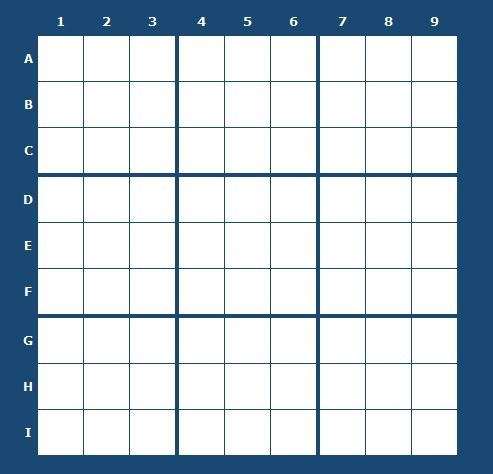

An Sudoku puzzle will start with some already determined numbers. These will be the bigger numbers, occupying a full cell. In WFCA, these represent the initial states. The empty cells will allow all possible states to start

Here is an example:

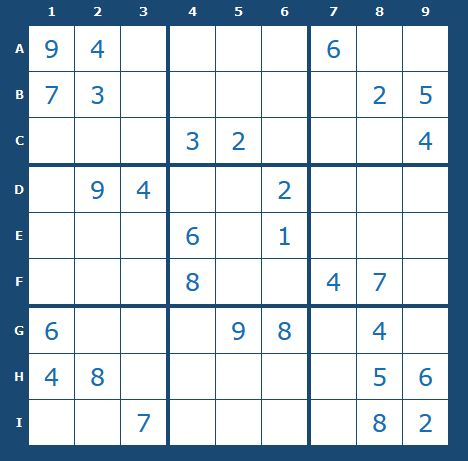

We can now update the possible states. We will restrict the possible states, by not allowing any of the possible states to contain a collapsed state in the same row, column, or square.

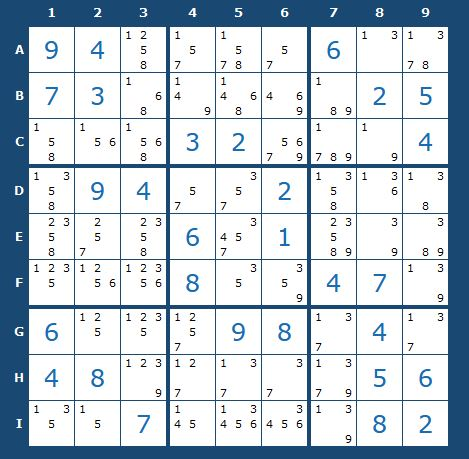

In order to solve this puzzle, we need to also conisder the rule that exactly one of each number must appear in each row, column, and square. To do so, we need to see how the possible states of each cell affects the other possible states. Take row I for example. Cell 7I is the only cell containing a 9, so it must collapse to a 9, even though there are not currently any 3s or 1s in the same square, row, or column. 

If we update the possible states so the elements unique to a row, column, or square, are the only allowed state, we get the following:
    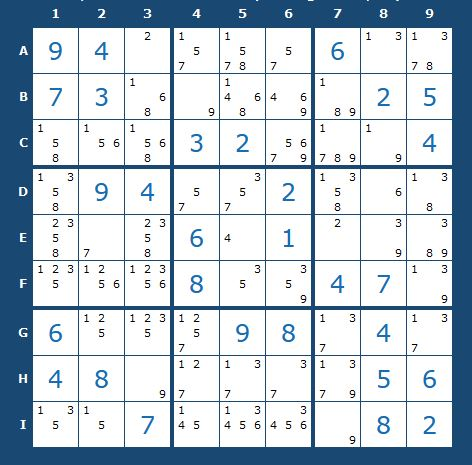

Now, I can choose a state with entropy 1 at random to collapse. Suppose I choose cell I7 to collapse. 

This yields:

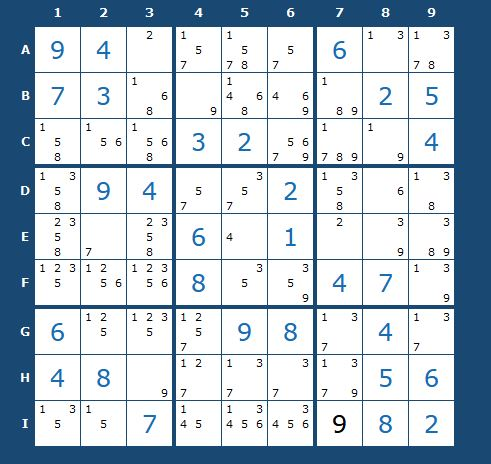

Once again, I can update the possible states by removing the 9s from the possible states of cells in row I, column 7, and the square in the bottom right corner.

This yields:

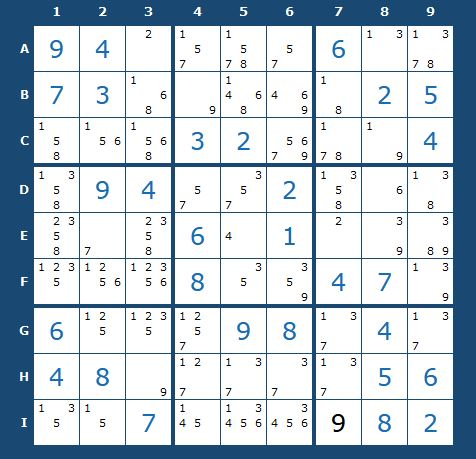

### Try it Yourself ###

Grab a piece of paper, and continue to update the cells like above to see the algorithm in action. When you finish, you should get the completed puzzle below.

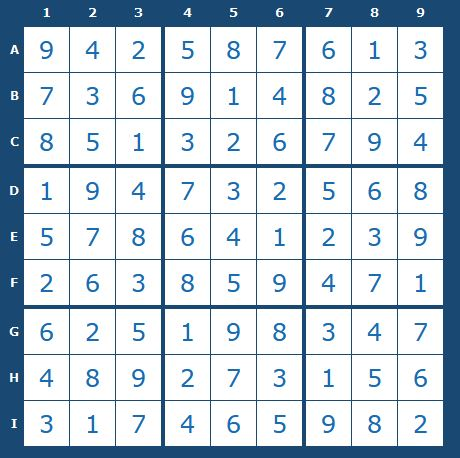

# Code #

Now that we have some understanding of the algorithm, and we have used a version of it to solve Sudoku, we will now work on implementing the algorithm in code. 

## Import Libraries ##

First, let's import the necessary libraries.

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import PIL as pil
import numpy as np
import copy as copy
import datetime
from tabulate import tabulate

## Tile Objects ##

Now, let's create the tile objects. Tiles will have the properties "possible" and "entropy". "possible" is the set containing all possible states. "entropy" is the number of remaining states. We will also create functions to collapse the tile to a single state and to update the entropy of a tile.

In [0]:
class Tile:
    '''The tile object will contain the values "possible" and "entropy". "possible" will contain all the possible states for a given tile. "entropy" will contain the number of possible states initially. This can be updated with the update function.'''
    
    def __init__(self, possible):
        '''This initializes the object. entropy will be initialized as the number of possible values.'''
        self.possible = possible
        self.entropy = len(possible)
        
    def collapse(self, val):
        '''This function will collapse a tile to a single state and will update the entropy.'''
        self.possible = {val}
        self.entropy = 1
        
    def update(self):
        '''Call this function after modifying possible to update the entropy.'''
        self.entropy = len(self.possible)
        


To demonstrate the Tile object, I have created three tiles. Each tile will have the same starting possible values, but tile y and z will have functions applied to them to update their results.

In [0]:
#These are the possible states for each tile
possible_states = {1,2,3,4,5,6,7,8,9}

#x is a tile with no restrictions
x = Tile(possible_states)
print("The possible states of x are " + str(x.possible))
print("The entropy of x is " + str(x.entropy))

#y is a tile that has collapsed to state 3
y = Tile(possible_states)
y.collapse(3)
print("\nThe possible states of y are " + str(y.possible))
print("The entropy of y is " + str(y.entropy))

#z is a tile that will be updated to remove state 7
z = Tile(possible_states)
z.possible.remove(7)
z.update()
print("\nThe possible states of z are " + str(z.possible))
print("The entropy of z is " + str(z.entropy))

## Exercise 1: Letter Tiles ##

Create 3 tiles. The first tile will represent an initial letter tile. This empty letter tile should allow all possible states. Create a second tile to represent a tile that has collapsed to the state "c". This should be done with the collapse function. The final tile will be a cell that allows all possible states except "a" and "e". For the final tile, start will all allowed states and update the tile and its entropy to get the final tile.

In [0]:
possible_states = {"a","b","c","d","e","f","g"}

tile1 = 

#Create tile1 here for the first tile

tile2 = 

#Create and update tile2 here for the second tile

tile3 = 

#Create and update tile3 here for the third tile

## Create the grid ##

Now that we have made our tile objects, we need to make our grid. This will be done with the create_grid function. The grid will be an array consisting of tiles in each possible location. I also would like to be able to see the possible states for each of the individual tiles, so I will create a function show() to output all of the possible values of the array in a nice table.

In [0]:
def create_grid(n, m, possible_states):
    '''This function will create an empty grid with fully uncollapsed tiles, all containing possible_states.'''
    grid = np.full((n, m), Tile(possible_states))
    
    return grid

def show(grid):
    '''This function will show all of the possible states in a given grid. They will be printed in a nice table.'''
    
    n,m = grid.shape
    output = copy.deepcopy(grid)
    
    for i in range(n):
        for j in range(m):
            output[i][j] = grid[i][j].possible
    
    print(tabulate(output, tablefmt = "fancy_grid"))
    return

Now, let's create a Sudoku grid to demonstrate. 

In [0]:
#This is the grid of tiles and will be useful for when we need to collapse the wavefunction.
grid = create_grid(5,5,{1,2,3,4,5,6,7,8,9})


#To output the possible states in a nice form, I need to call show(grid). Depending on your screen size resloution, this may not output nicely. If there are a lot of possible states of if there is a very large grid, the output will try wrapping. 
show(grid)

## Total Entropy Calculator ##

In order to aid in our algorithm, it may be useful to know the total entropy of the grid. We will create a function to calculate the sum of the entropy over all the tiles in the grid.

In [0]:
def entropy_sum(grid):
    '''This function sums the total entropy of the grid.'''
    
    entropy = 0
    n,m = grid.shape
    for i in range(n):
        for j in range(m):
            entropy += grid[i][j].entropy
    
    return entropy

## Create the Random Collapse Function ##

We need to be able to collapse an uncollapsed tile with the lowest entropy. This tile should be chosen at random from all the tiles with the same entropy. The coll function below will do so.

In [0]:
def coll(grid):
    '''This function will collapse at random an uncollapsed tile with the lowest entropy. It will check the tiles in grid.'''
    

    #Lowest is the lowest entropy, location is the set containing the locations of all tiles with that entropy
    lowest = 0
    location = []
    
    n,m = grid.shape
    
    #loop over all the tiles in the array
    for i in range(n):
        for j in range(m):
            #ent is the entropy for the tile in location i,j
            ent = grid[i][j].entropy
            #We only want uncollapsed tiles
            if ent > 1:
                #If i,j contains the first uncollapsed tile
                if lowest == 0:
                    lowest = ent
                    location = [(i,j)]
                #If i,j contains the new lowest entropy tile
                elif ent < lowest:
                    lowest = ent
                    location = [(i,j)]
                #If i,j contains a tie for lowest entropy 
                elif ent == lowest:
                    location.append((i,j))
                    
    if lowest == 0:
        print("All tiles are collapsed")
        return 
    
    #Select the tile to collapse. The choice function is not defined for a list of tuples, so I have to use the workaround
    x = np.random.choice(len(location),1)[0]
    i,j = location[x]
    
    #Select the state to collapse it to
    states = list(grid[i][j].possible)
    state = np.random.choice(states)

    #Collapse the tile
    new = copy.deepcopy(grid[i][j])
    new.collapse(state)
    grid[i][j] = new

    #return the grid
    return grid

Now that we have created this function, let's test it on a simple grid! Each time coll(grid) is called, the grid selects a random tile and collapses it. Once all the tiles are collapsed, we get the message "All tiles are collapsed". Note the decrease in the total entropy every time coll(grid) is called.

In [0]:
n = 2
m = 2
possible_states = {1,2,3,4,5,6,7,8,9}

grid = create_grid(n, m, possible_states)
show(grid)
print("The initial entropy is: " + str(entropy_sum(grid)))

for i in range (n*m):
    show(coll(grid))
    print("After " + str(i) + " collapses, the entropy is: " + str(entropy_sum(grid)))
coll(grid)

## Exercise 2: Random Letter String ##

Using the coll function and a 1 x n grid, create a random string of n letters. Output the show the initial uncollapsed grid and the final collapsed grid. The possible states should be all 26 letters. 

In [0]:
n = 10

'''Your code goes here'''

show(grid)

## Implementing the Rules of Sudoku ##

Now we have the grid and tiles in place, all that is left is to determine when to collapse and when to update tiles. This will be based on the rules of Sudoku. To start, we first want to make the update function. Everytime it is called, it will check each tile in the grid. If a tile has an entropy of 1, it will update all of the other cells in the same row, column, and square to remove the assoicated state. 

In [0]:
def update_sudoku(grid):
    '''This function will update all the states of the tiles in the grid in concordance with the rules of Sudoku.'''

    #loop over all the tiles in the array
    for i in range(9):
        for j in range(9):
            #ent is the entropy for the tile in location i,j
            ent = grid[i][j].entropy
            #We only want collapsed tiles
            if ent == 1:
                #val is the value that has been collapsed to
                val = next(iter(grid[i][j].possible))
                
                #remove val from the tiles in the same row
                for x in range(9):
                    if val in grid[i][x].possible and not x == j:
                        new = copy.deepcopy(grid[i][x])
                        new.possible.remove(val)
                        new.update()
                        grid[i][x] = new
                #remove val from the tiles in the same column
                for x in range(9):
                    if val in grid[x][j].possible and not x == i:
                        new = copy.deepcopy(grid[x][j])
                        new.possible.remove(val)
                        new.update()
                        grid[x][j] = new
                        
                #remove val from the tiles in the same square.
                
                #To determine what square i,j is in, we will use the floor function. a,b will be the cell at the top left corner of the square
                a,b = (int(3*floor(i/3)),int(3*floor(j/3)))
                
                #Now, we can loop over all the elements in the square, except for cell i,j
                for x in range(3):
                    for y in range(3):
                        if val in grid[a+x][b+y].possible and not (i,j) == (a+x,b+y):
                            new = copy.deepcopy(grid[a+x][b+y])
                            new.possible.remove(val)
                            new.update()
                            grid[a+x][b+y] = new
                            
    #Once all the cells are updated, we return the grid
    return grid

Now, we can show the update_sudoku function in action. Suppose we have a 9 x 9 grid containing only three possible states for each cell. Suppose every cell except for the cell located at (2,4) is uncollapsed. I can call update to update the cells in the same row, column, and square as (2,4).

In [0]:
#This creates the fully uncollapsed grid
n = 9
m = 9
possible_states = {1,2,3}
grid = create_grid(n, m, possible_states)

#To collapse a cell, I need a deepcopy, due to the way python stores in memory. This will create the grid with only one collapsed cell
new = copy.deepcopy(grid[2][4])
new.collapse(1)
grid[2][4] = new

new = copy.deepcopy(grid[8][7])
new.collapse(2)
grid[8][7] = new
show(grid)

#I can now update the other cells
grid = update_sudoku(grid)
show(grid)

## The Sudoku Solver ##

All that is left now is to put the two phases of the algorithm together. The algorithm will start by updating. We will keep updating until the grid stops updating. After that, the random collapse function will be called. Then, we go back to the updating phase. This will repeat until every state is collapsed.

In [0]:
def solve(grid, n_tries = 200, count_print = False):
    
    '''This function will solve Sudoku puzzles using WFC. If n_tries is exceeded, the function will return. If count_print is set to True, the number of tries needed to find a solution will be printed.'''
    #This counter will increment everytime the algorithm is run. If no possible solution is found, we reset to the orignal grid and try again.
    counter = 0
    #I will keep a copy of the original grid for reference
    original = copy.deepcopy(grid)
    n,m = grid.shape
    while counter < n_tries:
        
        #Reset the grid with each iteration
        grid = copy.deepcopy(original)
        previous = 0
        entropy = entropy_sum(grid)
        #illegal will turn true if we find an illegal configuration
        illegal = False
        while entropy > n*m:
            
            #This verifies that there are no illegal configurations
            for i in range(n):
                for j in range(m):
                    if grid[i][j].entropy == 0:
                        illegal = True
            if illegal == True:
                break
                
            # If the values are equal, then updating has stopped changing our grid
            if entropy == previous:
                coll(grid)
            
            #This updates the grid and it's entropy
            previous = entropy
            update_sudoku(grid)
            entropy = entropy_sum(grid)
            
        if entropy == n*m:
            if count_print:
                print("The number of tries needed to find a solution was: " + str(counter + 1))
            return grid
        
        counter += 1
    
    print("No solution found in " + str(n_tries) + " tries!")
    
    return

Let's demonstrate the solver on some Sudoku puzzles! The first puzzle will have no possible solution. Notice how the initial grid has two 1s in the same row. The function outputs as expected.

In [0]:
#This creates the fully uncollapsed grid
n = 9
m = 9
possible_states = {1,2,3,4,5,6,7,8,9}
grid = create_grid(n, m, possible_states)

#We now create the illegal configuration
new = copy.deepcopy(grid[0][0])
new.collapse(1)
grid[0][0] = new

new = copy.deepcopy(grid[0][2])
new.collapse(1)
grid[0][2] = new

#Now, let's try running solve
solve(grid)

If we instead run solve on the Sudoku puzzle, we worked at the beginning of the notebook, it will return the solution (given enough tries).

In [0]:
#This creates the fully uncollapsed grid
n = 9
m = 9
possible_states = {1,2,3,4,5,6,7,8,9}
grid = create_grid(n, m, possible_states)

#To create the puzzle, I made a dictionary of known values, each representing a known cell in the puzzle.

known = {(0,0):9, (0,1):4, (0,6):6, (1,0):7, (1,1):3, (1,7):2, (1,8):5, (2,3):3, (2,4):2, (2,8):4, (3,1):9, (3,2):4, (3,5):2, (4,3):6, (4,5):1, (5,3):8, (5,6):4,(5,7):7,(6,0):6,(6,4):9,(6,5):8,(6,7):4,(7,0):4,(7,1):8,(7,7):5,(7,8):6,(8,2):7,(8,7):8,(8,8):2}

for x in known:
    i,j = x
    
    new = copy.deepcopy(grid[i][j])
    new.collapse(known[x])
    grid[i][j] = new
    
#Now, let's try running solve
show(solve(grid, count_print = True))

## Exercise 3 ##

Find a Sudoku puzzle and enter it's known values as a dictionary, similar to how I did above. Then solve the puzzle using the solver.

In [0]:
#This creates the fully uncollapsed grid
n = 9
m = 9
possible_states = {1,2,3,4,5,6,7,8,9}
grid = create_grid(n, m, possible_states)

'''Create the Sudoku puzzle here.'''

#Now, let's try running solve
show(solve(grid))

## Optional Exercise 1 ##

Every time a guess leads to an illegal puzzle, the solve function starts over. This is rather inefficient. To improve this, implement backtracking. To implement backtracking, the solver should record the states of the grid before it makes a guess. If the guess leads to an illegal puzzle, revert to the previously saved grid and remove the guess from the allowed states in that cell. This is similar to a depth first search.

In [0]:
'''Your updated function here'''

## Create the Terrain Generator ##

Now, we will create the terrain generator. The rule for the terrain is simple. Each type of terrain boundary must border the same type of terrain. To make for easy filenames, each type of terrain is stored as an 8 character string. Each character represents a section of the boundary, as shown in the picture below.

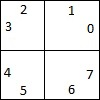

There are two types of terrain: grass and water. Grass will be represented by G, and water by W. For example, the tile GGWWWWGG is shown below.

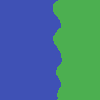

With this in mind, let's implement the terrain generator!

In [0]:
def update_terrain(grid):
    '''This function will update all the states of the tiles in the grid in concordance with the rules of the the terrain adjacencies.'''
    
    n,m = grid.shape
    
    #loop over all the tiles in the array
    for i in range(n):
        for j in range(m):
            #ent is the entropy for the tile in location i,j
            ent = grid[i][j].entropy
            #We only want collapsed tiles
            if ent == 1:
                #val is the value that has been collapsed to
                val = next(iter(grid[i][j].possible))
                
                #update the tiles to the right
                if not j == m-1:
                    #This string represents the right boundary of a tile
                    bound = val[0] + val[7]
                    #I need to deepcopy due to the way that sets are stored in memory in Python
                    new = copy.deepcopy(grid[i][j+1])
                    y = copy.deepcopy(new.possible)
                    
                    #This checks each state in the adjacent tile, and updates y accordingly
                    for x in new.possible:
                        if not x[3:5] == bound:
                            y.remove(x)
                    new.possible = y
                    new.update()
                    
                    #This updates the tile
                    grid[i][j+1] = new
                    
                    
                #update the tiles to the left
                if not j == 0:
                    #This string represents the left boundary of a tile
                    bound = val[3:5]
                    #I need to deepcopy due to the way that sets are stored in memory in Python
                    new = copy.deepcopy(grid[i][j-1])
                    y = copy.deepcopy(new.possible)

                    for x in new.possible:
                        if not (x[0]+x[7]) == bound:
                            y.remove(x)
                    new.possible = y
                    new.update()
                    grid[i][j-1] = new
                    
                #update the tiles to the top
                if not i == 0:
                    #This string represents the top boundary of a tile
                    bound = val[1:3]
                    #I need to deepcopy due to the way that sets are stored in memory in Python
                    new = copy.deepcopy(grid[i-1][j])
                    y = copy.deepcopy(new.possible)

                    for x in new.possible:
                        #I need this values reversed, to make sure I am comparing the boundary properly
                        if not (x[6]+x[5]) == bound:
                            y.remove(x)
                    new.possible = y
                    new.update()
                    grid[i-1][j] = new
                    
                #update the tiles to the bottom
                if not i == n-1:
                    #This string represents the top boundary of a tile
                    bound = val[5:7]
                    #I need to deepcopy due to the way that sets are stored in memory in Python
                    new = copy.deepcopy(grid[i+1][j])
                    y = copy.deepcopy(new.possible)

                    for x in new.possible:
                        #I need these values reversed, to make sure I am comparing the boundary properly
                        if not (x[2]+x[1]) == bound:
                            y.remove(x)
                    new.possible = y
                    new.update()
                    grid[i+1][j] = new

    #Once all the cells are updated, we return the grid
    return grid

Let's show the terrain update in action! I will create a small grid, with some of the possible terrains as possible states. When we update the grid, some values will be removed, as expected.

In [0]:
n = 3
m = 3
possible_states = {"WWWWWWWW","WWWWWWGG","WWWWGGWW"}

grid = create_grid(n, m, possible_states)
show(grid)

new = copy.deepcopy(grid[1][1])
new.collapse("WWWWWWWW")
grid[1][1] = new
show(grid)

update_terrain(grid)
show(grid)

## Creating the Generate Terrain Function ##

Now, we can make the complete generate_terrain function! It will function nearly identical to the solve function for Sudoku. The only difference comes in the update function we call.

In [0]:
def generate_terrain(grid, n_tries = 200, count_print = False):
    
    '''This function will generate a terrain using the grid provided. The function will use the update terrain function for its ruleset.'''
    
    #This counter will increment everytime the algorithm is run. If no possible solution is found, we reset to the orignal grid and try again.
    counter = 0
    #I will keep a copy of the original grid for reference
    original = copy.deepcopy(grid)
    n,m = grid.shape
    while counter < n_tries:
        
        #Reset the grid with each iteration
        grid = copy.deepcopy(original)
        previous = 0
        entropy = entropy_sum(grid)
        #Null will turn true if we find an illegal configuration
        illegal = False
        while entropy > n*m:
            
            #This verifies that there are no illegal configurations
            for i in range(n):
                for j in range(m):
                    if grid[i][j].entropy == 0:
                        illegal = True
            if illegal == True:
                break
                
            # If the values are equal, then updating has stopped changing our grid
            if entropy == previous:
                coll(grid)
            
            #This updates the grid and it's entropy
            previous = entropy
            update_terrain(grid)
            entropy = entropy_sum(grid)
            
        if entropy == n*m:
            if count_print:
                print("The number of tries needed to find a solution was: " + str(counter + 1))
            return grid
        
        counter += 1
    
    print("No solution found in " + str(n_tries) + " tries!")
    
    return

In [0]:
Let's test it!

In [0]:
#This creates the fully uncollapsed grid
n = 10
m = 10

#These are all the possible terrain tiles
possible_states = {"WWWWWWWW","WWWWWWGG","WWWWGGWW","WWGGWWWW","GGWWWWWW","WWWWGGGG","WWGGGGWW","GGGGWWWW","GGWWWWGG","WWGGGGGG","GGGGGGWW","GGGGWWGG","GGWWGGGG","WWGGGGGG","GGGGGGGG"}
grid = create_grid(n, m, possible_states)

#Now, let's try running generate_terrain.
grid = generate_terrain(grid)
show(grid)

## Create the image ##

Now that the terrain generator is functional, I would like to be able to create an image of the terrain to view. To do so, we will work with PIL. In the function generate_image, we will input a generated terrain grid, and the function will save the final terrain as a png. 

In [0]:
def generate_image(grid):
    '''This funciton will take a fully collapsed terrain array and will create a single jpeg from the fully collapsed terrain grid. It will save the image in the terrains folder.'''
    
    n,m = grid.shape
    
    grid1 = copy.deepcopy(grid)
    #Create an empty image to build
    im = pil.Image.new('RGB', (100*n, 100*m))
    
    #loop over all the tiles in the array
    for i in range(n):
        for j in range(m):
            #This will take the string from a tile
            tile = grid[i][j].possible.pop()
            #This will use the string to open the corresponding terrain image
            terrain = pil.Image.open("terrain_tiles/" + tile + ".png")
            #This will paste the terrain image to it's corresponding location in the final image.
            im.paste(terrain, (100*i,100*j))
            
    im.save('terrains/{}.png'.format(datetime.datetime.now()))

Now, let's generate an image! After you run the code, check the corresponding file. (The CPU requirements grows quickly. Don't make the grid too large, or you will be waiting a while.)

In [0]:
#This creates the fully uncollapsed grid
n = 10
m = 10

#These are all the possible terrain tiles
possible_states = {"WWWWWWWW","WWWWWWGG","WWWWGGWW","WWGGWWWW","GGWWWWWW","WWWWGGGG","WWGGGGWW","GGGGWWWW","GGWWWWGG","WWGGGGGG","GGGGGGWW","GGGGWWGG","GGWWGGGG","WWGGGGGG","GGGGGGGG"}
grid = create_grid(n, m, possible_states)

#Now, let's try running generate_terrain.
grid = generate_terrain(grid)
generate_image(grid)

## Exercise 4 ##

There is a mountain tile image titled "MMMMMMMM", located in the same folder as the other images. Use this image to create a mountain tile. The mountain tile is only allowed to border grass on all sides. Implement the necessary changes to the update function as you implement the tile. 

In [0]:
'''Your work here'''

## Optional Exercise 2 ##

Another way this algorithm's efficiency can be improved is in the update phase. Currently, we are checking every single tile, everytime another tile is collapsed. This is extremely inneficient. To improve the runtime, only check the tiles that are affected by a collapse. If a tile is affected, check it's neighbors as well. 

In [0]:
'''Your improved function here'''

## Optional Exercise 3 ##

In this implementation, we assumed every state is equally likely. This is not necessary. Modify the terrain generation to select "GGGGGGGG" and "WWWWWWWW" with higher bias, and see how the terrain changes. Can you make the terrain more realistic with a different bias?

In [0]:
'''Your code here'''